# Unsupervised Classification of Pollutants

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.7.0


In [7]:
df = pd.read_csv(r"../DailyWeatherData.csv")

In [390]:
df.head()

,Fecha,Sensor_id,PM10,PM25,O3,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,VIENTOVEL,RS
0,2022-01-01,ANL1,78.000000,13.485972,0.023708,15.975208,0.0,721.343056,54.687500,5.856944,0.066339
1,2022-01-02,ANL1,63.312500,10.752917,0.022917,15.975208,0.0,724.288889,54.687500,8.354167,0.044434
2,2022-01-03,ANL1,32.625000,8.228333,0.024792,15.975208,0.0,723.117708,54.687500,4.841667,0.061191
3,2022-01-04,ANL1,46.750000,16.111667,0.025417,15.975208,0.0,724.248958,54.687500,9.046528,0.064572
4,2022-01-05,ANL1,62.478261,19.128696,0.023000,15.961957,0.0,722.626812,54.673913,7.321739,0.100207


In [8]:
df = df[["PM10", "PM25"]]
df[["PM10^2", "PM25^2"]] = df[["PM10", "PM25"]] ** 2

In [546]:
df.describe()

,PM10,PM25
count,13090.000000,13090.000000
mean,59.435849,19.467681
std,22.595559,9.585944
min,4.875000,0.218587
25%,43.166667,12.358670
50%,56.087121,17.541667
75%,73.354167,24.771504
max,152.238509,65.227831


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized)
df_standardized


,0,1,2,3
0,0.821615,-0.624032,0.664221,-0.595574
1,0.171573,-0.909154,-0.011283,-0.732094
2,-1.186599,-1.172527,-0.969468,-0.830846
3,-0.561453,-0.350111,-0.604570,-0.435421
4,0.134652,-0.035364,-0.045437,-0.216315
...,...,...,...,...
13085,-0.122559,0.261839,-0.270793,0.025016
13086,0.012060,0.502190,-0.155588,0.244648
13087,0.491523,0.724377,0.303651,0.467141
13088,0.529327,0.146077,0.343109,-0.072960


In [420]:
pm10 = [0, 3]
pm25 = [1, 4]
o3 = [2, 5]

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


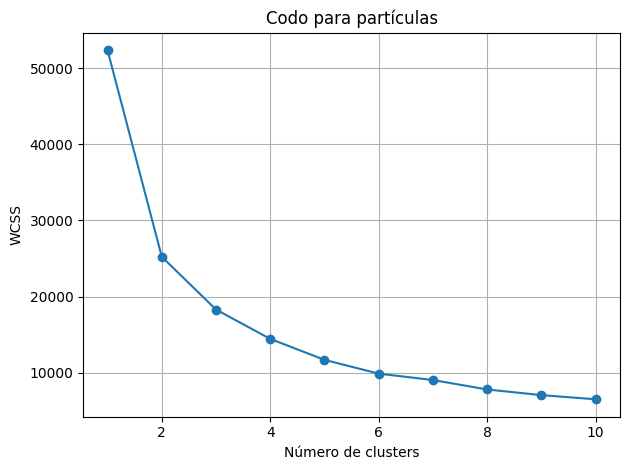

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, algorithm='elkan')
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Codo para partículas')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


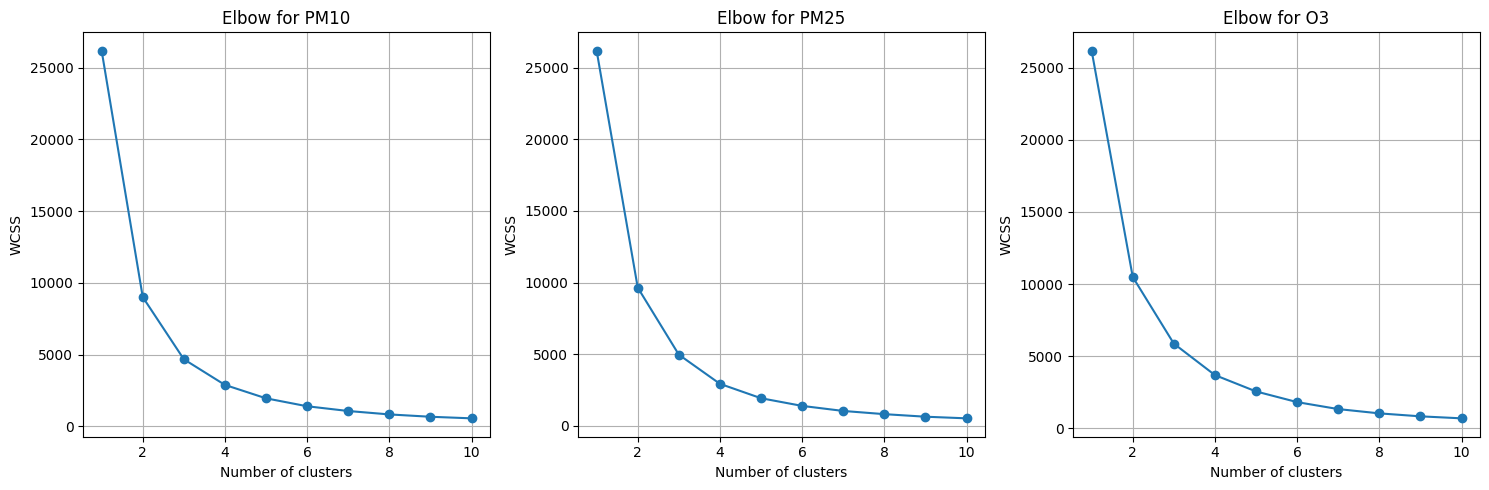

In [428]:
def get_elbow_all_moleculas():
    moleculas = {
        "pm10": pm10,
        "pm25": pm25,
        "o3": o3
    }

    n_moleculas = len(moleculas)
    fig, axes = plt.subplots(1, n_moleculas, figsize=(5 * n_moleculas, 5))

    if n_moleculas == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, (molecula, cols) in zip(axes, moleculas.items()):
        # Compute WCSS for this molecula
        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, algorithm='elkan')
            kmeans.fit(df_standardized[cols])
            wcss.append(kmeans.inertia_)

        # Plot the elbow curve
        ax.plot(range(1, 11), wcss, marker='o')
        ax.set_title(f'Elbow for {molecula.upper()}')
        ax.set_xlabel('Number of clusters')
        ax.set_ylabel('WCSS')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

get_elbow_all_moleculas()

In [ ]:
moleculas = {
"pm10": pm10,
"pm25": pm25,
"o3": o3
}

,0,3
0,0.821615,0.664221
1,0.171573,-0.011283
2,-1.186599,-0.969468
3,-0.561453,-0.604570
4,0.134652,-0.045437
...,...,...
13085,-0.122559,-0.270793
13086,0.012060,-0.155588
13087,0.491523,0.303651
13088,0.529327,0.343109


In [451]:
pd.DataFrame(round(df.groupby('cluster').mean(),1))

,PM10,PM25,O3,PM10^2,PM25^2,O3^2
cluster,,,,,,
1,47.8,16.5,0.0,2455.2,325.4,0.0
2,88.1,26.9,0.0,7968.8,830.4,0.0


In [ ]:
def get_model(n_cluster=3, molecula="pm10"): 
    moleculas = {
    "pm10": pm10,
    "pm25": pm25,
    "o3": o3
    }
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = n_cluster, random_state = 42, algorithm="elkan")
    y_kmeans = kmeans.fit_predict(df_standardized[moleculas[molecula]])
    #beginning of  the cluster numbering with 1 instead of 0
    y_kmeans1=y_kmeans
    y_kmeans1=y_kmeans+1
    # New Dataframe called cluster
    cluster = pd.DataFrame(y_kmeans1)
    # Adding cluster to the Dataset1
    df['cluster'] = cluster
    #Mean of clusters
    kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
    kmeans_mean_cluster
    
get_model()

KeyError: "['cluster'] not in index"

In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, random_state = 42, algorithm="elkan")
y_kmeans = kmeans.fit_predict(df_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,PM10,PM25,PM10^2,PM25^2
cluster,,,,
1,48.8,15.0,2585.7,253.7
2,84.9,30.2,7516.7,988.5


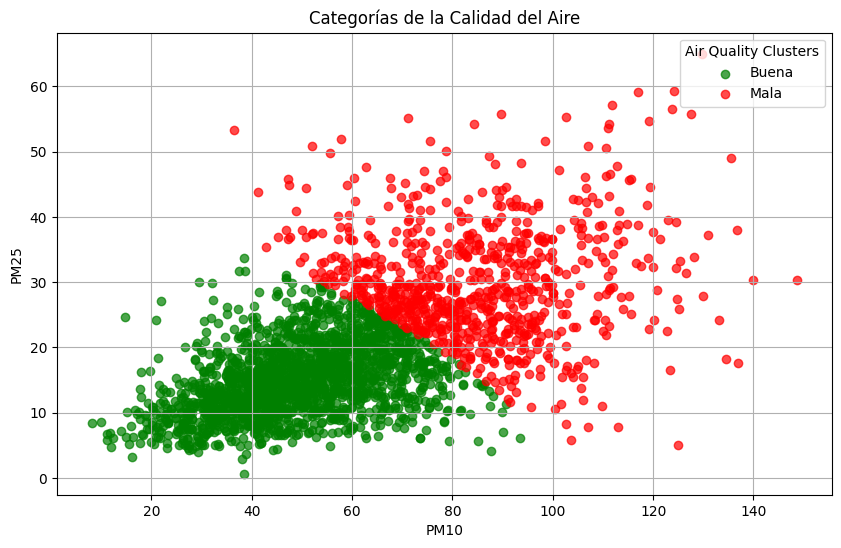

In [12]:
import matplotlib.pyplot as plt

# Example variables for the scatter plot
x_col = "PM10"
y_col = "PM25"
N = 20  # percentage of data to select

# Calculate how many rows correspond to N%
n_rows = int(len(df) * (N / 100))

# Select N% of the rows randomly
df_sample = df.sample(n=n_rows, random_state=42)  # random_state for reproducibility

# Define cluster-specific colors and labels
cluster_colors = {
    1: "green",    # Unhealthy
    2: "red",       # Really Bad
}

cluster_labels = {
    1: "Buena",
    2: "Mala"
}

# Define the desired order of clusters for the legend
ordered_clusters = [1, 2]

plt.figure(figsize=(10, 6), facecolor='none')

# Plot each cluster separately in the desired order
for cluster in ordered_clusters:
    cluster_data = df_sample[df_sample["cluster"] == cluster]
    if not cluster_data.empty:  # Plot only if there is data for the cluster
        plt.scatter(
            cluster_data[x_col],
            cluster_data[y_col],
            color=cluster_colors.get(cluster, "gray"),
            label=f"{cluster_labels.get(cluster, 'Unknown')}",
            alpha=0.7
        )

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Categorías de la Calidad del Aire")
plt.legend(title="Air Quality Clusters", loc='upper right')
plt.grid(True)
plt.gca().patch.set_alpha(0)  # Make the axis background transparent
plt.show()


In [585]:
df_sample

,PM10,PM25,O3,PM10^2,PM25^2,O3^2,cluster
5653,37.250000,21.487917,0.033583,1387.562500,461.730563,0.001128,2
10547,70.494048,8.968549,0.066498,4969.410750,80.434870,0.004422,2
7414,38.666667,10.958333,0.041083,1495.111111,120.085069,0.001688,2
8731,67.800000,21.086667,0.023183,4596.840000,444.647511,0.000537,1
1655,25.270833,11.229167,0.018458,638.615017,126.094184,0.000341,1
...,...,...,...,...,...,...,...
9485,99.916667,29.541667,0.021771,9983.340278,872.710069,0.000474,3
710,62.850000,21.439333,0.008733,3950.122500,459.645014,0.000076,1
4913,44.210526,10.853158,0.011526,1954.570637,117.791036,0.000133,1
9254,43.708333,17.500000,0.019083,1910.418403,306.250000,0.000364,1


In [13]:
# Make sure to select the features as a 2D matrix (X)
X = df_sample[["PM10", "PM25", "PM10^2", "PM25^2"]]

score = silhouette_score(X, df_sample["cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.5095437961909732


In [14]:
import pickle 

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [15]:
pm25 = 20
pm10 = 20
pm25_sqr = pm25 ** 2
pm10_sqr = pm10 ** 2

predictionData = pd.DataFrame({
    "PM10": [pm10],
    "PM25": [pm25],
    "PM10^2": [pm10_sqr],
    "PM25^2": [pm25_sqr]
})

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

new_df_standardized = scaler.transform(predictionData)

In [16]:
kmeans.predict(new_df_standardized)

array([0])

In [17]:
with open("Clasificacion_Calidad_Aire.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [411]:
with open("Clasificacion_Calidad_Aire.pkl", "rb") as f:
    loaded_kmeans = pickle.load(f)
# Example usage
labels = loaded_kmeans.predict(new_df_standardized)
labels

array([0])

# Función para página web

In [498]:
import pandas as pd
import pickle 

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
    
with open("Clasificacion_Calidad_Aire.pkl", "rb") as f:
    loaded_kmeans = pickle.load(f)

#YY-m-d 
def get_air_quality(fecha_objetivo, contaminante=None): 
    df = pd.read_csv(r"../DailyWeatherData.csv")
    df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d")
    
    """ if contaminante not in df.columns:
        raise ValueError(f"Contaminante '{contaminante}' no encontrado.") """

    # ANL12 = Obispado, ANL4 = San Pedro, ANL8 = Cadereyta
    datos_dia = df.loc[(df["Fecha"].dt.strftime("%Y-%m-%d") == fecha_objetivo) & (df["Sensor_id"].isin(["ANL11", "ANL4", "ANL8"])), ["Sensor_id", "PM10", "PM25"]].sort_values(by="Sensor_id").copy()
    
    datos_dia[["PM10^2", "PM25^2"]] = datos_dia[["PM10", "PM25"]] ** 2
    
    df_standardized = scaler.transform(datos_dia.drop(columns="Sensor_id"))
    clasification = loaded_kmeans.predict(df_standardized)
    
    score = {
        "Obispado" : clasification[0],
        "San Pedro" : clasification[1],
        "Cadereyta" : clasification[2]
    }
    
    return score
    

In [499]:
get_air_quality("2022-04-04")

{'Obispado': 0, 'San Pedro': 1, 'Cadereyta': 0}

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import polars as pl
from datetime import datetime
from IPython.display import display

registros = pl.read_csv("../DailyWeatherData.csv").to_pandas()

registros["Fecha"] = pd.to_datetime(registros["Fecha"], format="%Y-%m-%d", errors="coerce")
registros = registros.dropna(subset=["Fecha"])

sensores = pd.read_excel("../sensores_airenuevoleon.xlsx")
registros = registros.merge(sensores[["Sensor_id", "Latitud", "Longitud"]], on="Sensor_id", how="left")
registros = registros.dropna(subset=["Latitud", "Longitud"])

def gaussian_plume(lat, lon, velocidad, direccion, contaminante_val, n_puntos=50):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    dir_rad = np.radians(direccion)
    distancias = np.linspace(0.001, 0.02, n_puntos)
    puntos = []
    for d in distancias:
        sigma = 0.002 + d * 2
        for _ in range(10):
            lat_disp = lat + d * np.cos(dir_rad)
            lon_disp = lon + d * np.sin(dir_rad)
            lat_disp += np.random.normal(0, sigma)
            lon_disp += np.random.normal(0, sigma)
            intensidad = contaminante_val * np.exp(-d * 100)
            puntos.append([lat_disp, lon_disp, intensidad / 150])
    return puntos

def mostrar_mapa_contaminante(fecha_objetivo: str, contaminante: str):
    if contaminante not in registros.columns:
        raise ValueError(f"Contaminante '{contaminante}' no encontrado.")

    datos_dia = registros[
        (registros["Fecha"].dt.strftime("%Y-%m-%d") == fecha_objetivo) &
        (registros[contaminante].notna()) &
        (registros[contaminante] >= 0)
    ].copy()

    print(f"Mostrando mapa para {contaminante} el {fecha_objetivo} con {len(datos_dia)} registros.")
    
    heat_data = []
    for _, fila in datos_dia.iterrows():
        velocidad = fila["VIENTOVEL"] if pd.notna(fila["VIENTOVEL"]) else 1
        direccion = fila["RS"] if pd.notna(fila["RS"]) else 0

        puntos = gaussian_plume(
            lat=fila["Latitud"],
            lon=fila["Longitud"],
            velocidad=velocidad,
            direccion=direccion,
            contaminante_val=fila[contaminante]
        )
        heat_data.extend(puntos)

    mapa = folium.Map(location=[25.67, -100.31], max_zoom=11, zoom_start=10, tiles="CartoDB positron")
    HeatMap(
        heat_data,
        radius=30,
        max_opacity=0.7,
        blur=20,
        gradient={0.1: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'},
        min_opacity=0.3
    ).add_to(mapa)
    
    return mapa
